# Random Forest
---

Segun el paper con un clasificador basado en Random Forest deberiamos lograr un AUC de 1. Entrenar un Random Forest con búsqueda de hiperparametros que logre un AUC de 1 (¿cómo conviene elegir los datos de validación respecto de los de train?). El modelo debe cumplir las siguientes condiciones:

* Deben utilizar AUC-ROC como métrica de validación.
* Deben medirse solo en validación, no contra test!!!
* Deben ser reproducibles (correr el notebook varias veces no afecta al resultado).
* Deben tener un score en validación igual a 1.

In [1]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from category_encoders import BinaryEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('data/secondary_data.csv', sep=';')
df

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


In [3]:
# Lleno los valores faltantes con el mismo valor.
df.fillna('?', inplace=True)

X = df.drop(['class'], axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [4]:
# Encodeo las variables categoricas.
be = BinaryEncoder()
X_train = be.fit_transform(X_train)
X_test = be.transform(X_test)

columnas_encodeadas = X_train.columns

# Encodeo la variable target.
ohe = OneHotEncoder(drop='first')
y_train = ohe.fit_transform(y_train.values.reshape(-1,1)).toarray()[:,0]
y_test = ohe.transform(y_test.values.reshape(-1,1)).toarray()[:,0]

In [5]:
rf = RandomForestClassifier(random_state=123)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=123)

In [6]:
cross_validate(rf, X_train, y_train, cv=5, scoring='roc_auc')

{'fit_time': array([2.2509203 , 2.23558211, 2.19802332, 2.20676851, 2.13375235]),
 'score_time': array([0.09902787, 0.09919977, 0.10221124, 0.1018765 , 0.10094881]),
 'test_score': array([1., 1., 1., 1., 1.])}

## Matriz de Confusión

Text(45.25, 0.5, 'Real')

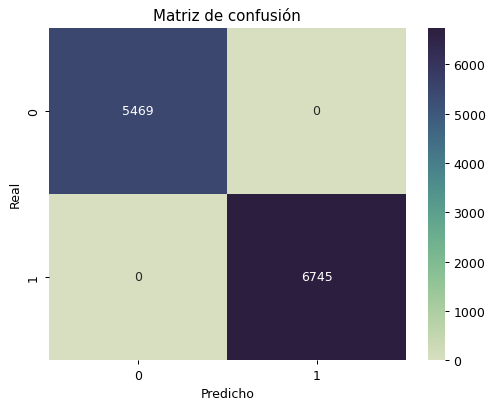

In [7]:
preds = rf.predict(X_test)
cm = confusion_matrix(y_test, preds)
plt.figure(dpi=90)
sns.heatmap(cm, annot=True, fmt='g', cmap=sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True))
plt.title('Matriz de confusión')
plt.xlabel('Predicho')
plt.ylabel('Real')

## Importancia de las Features

In [8]:
features = pd.DataFrame({'feature': columnas_encodeadas, 'importance': rf.feature_importances_})
features.feature = features.feature.map(lambda x: x.split('_')[0])
features = features.groupby('feature').sum().reset_index()
features

,feature,importance
0,cap-color,0.037388
1,cap-diameter,0.058971
2,cap-shape,0.048959
3,cap-surface,0.077013
4,does-bruise-or-bleed,0.036090
5,gill-attachment,0.093752
6,gill-color,0.073722
7,gill-spacing,0.076181
8,habitat,0.027573
9,has-ring,0.027113


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'cap-color'),
  Text(1, 0, 'cap-diameter'),
  Text(2, 0, 'cap-shape'),
  Text(3, 0, 'cap-surface'),
  Text(4, 0, 'does-bruise-or-bleed'),
  Text(5, 0, 'gill-attachment'),
  Text(6, 0, 'gill-color'),
  Text(7, 0, 'gill-spacing'),
  Text(8, 0, 'habitat'),
  Text(9, 0, 'has-ring'),
  Text(10, 0, 'ring-type'),
  Text(11, 0, 'season'),
  Text(12, 0, 'spore-print-color'),
  Text(13, 0, 'stem-color'),
  Text(14, 0, 'stem-height'),
  Text(15, 0, 'stem-root'),
  Text(16, 0, 'stem-surface'),
  Text(17, 0, 'stem-width'),
  Text(18, 0, 'veil-color'),
  Text(19, 0, 'veil-type')])

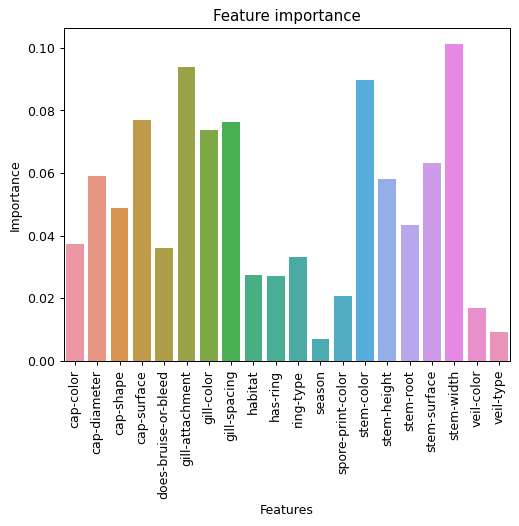

In [9]:
plt.figure(dpi=90)
sns.barplot(features, x='feature', y='importance')
plt.title('Feature importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)